<img src="./img/logo_UTN.svg" align="right" width="300" />

# Trabajo Semanal 1 - Teoría de Circuitos 2
### Autor: Santiago Palozzo

<img src="./img/circuito.png" align="center" width="600" />

# 1. Desarrollo en papel

- Cálculo de la transferencia, módulo, fase y diagrama de polos y ceros. Transferencia normalizada y red normalizada.

In [5]:
from IPython.display import IFrame
IFrame("./desarrollo_pasatodo.pdf", width=800, height=800)

# 2. Tipo de filtro

Este circuito representa dos posibles tipos de filtros, dependiendo de la relacion $\frac{R_2}{R_1}$.  
- **Caso A**: si $\frac{R_2}{R_1} = 1$ estaremos ante un **filtro pasa todo (o rotador de fase)**.  
- **Caso B**: si $R_1 >> R_2$ entonces $\frac{R_2}{R_1} \rightarrow 0$ . En este caso, el circuito se comportará como un **pasa altos**.

# 3. Función transferencia normalizada 

- La **norma de frecuencia** elegida es $\Omega_\omega = \omega_0 = \frac{1}{R_3 C}$
- **Interpretación circuital**: la norma de frecuencia me indica la frecuencia corte del filtro, en este caso 1. Para trasladar el filtro a la frecuencia que uno desee, basta con multiplicar por dicho valor en vez del normalizado. Esto simplifica mucho el análisis del circuito ya que trabajamos a una escala mucho menor.

# 4. Simulación circuital en LTSpice

 


### 4.1 Filtro pasa todo

<img src="./img/circuitoPT_spice.png" align="center" width="900" /> 

<img src="./img/pasatodo_spice.png" align="center" width="900" />  
  
### 4.2 Filtro pasa altos

<img src="./img/circuitoPA_spice.png" align="center" width="900" /> 

<img src="./img/pasaaltos_spice.png" align="center" width="900" />  


# 5. Simulación circuital en Python

In [1]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
#%%

In [2]:
#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

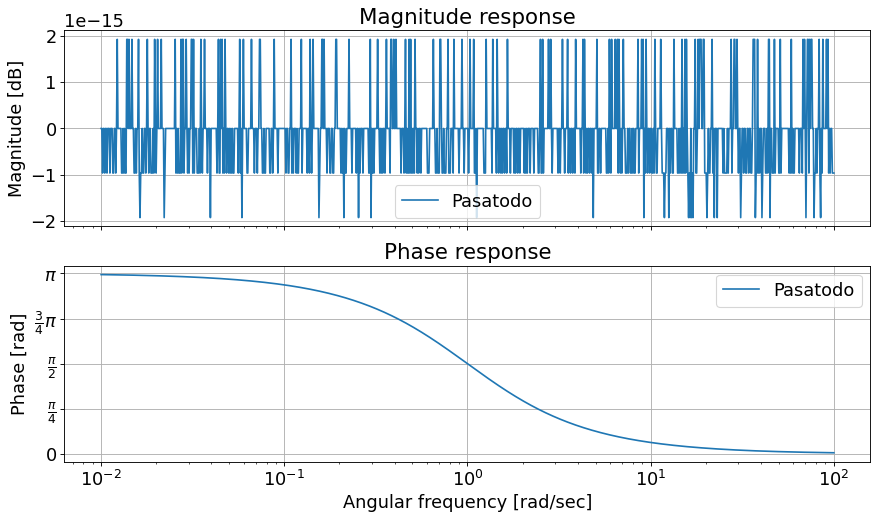

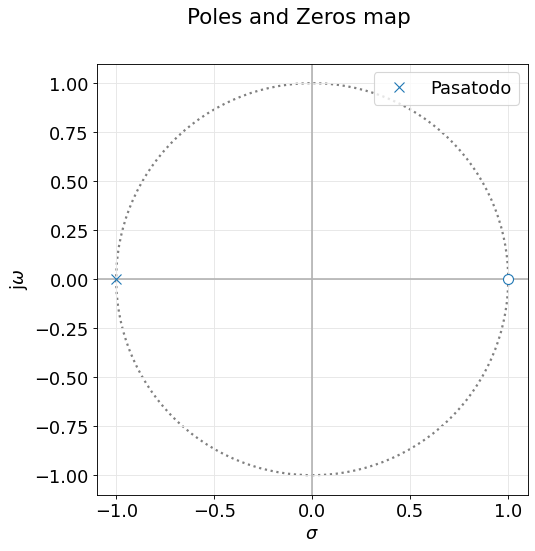

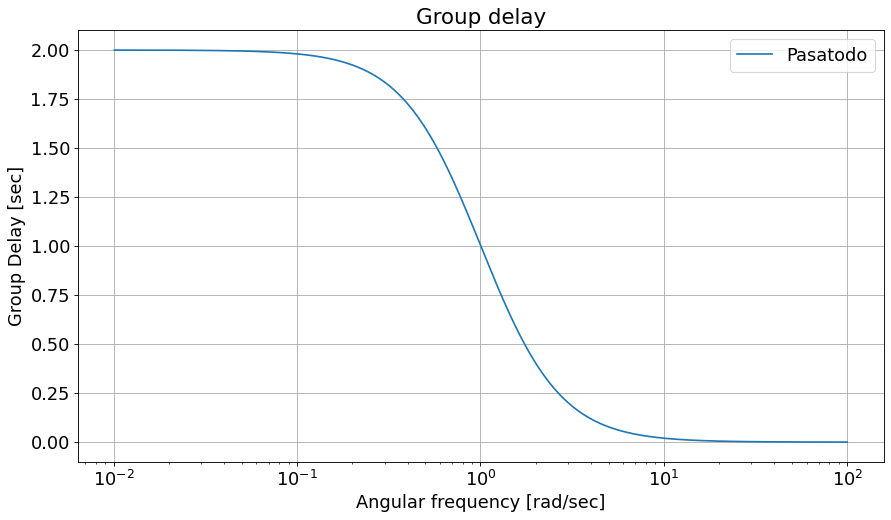

In [4]:
R1= 1000; R2=1000; R3=1000; C=1e-6;

#w0 = 1/(R3*C)
w0 = 1

my_tf_norm = TransferFunction( [1, -(R2/R1)*w0], [1, w0] )

plt.close('all')

bodePlot(my_tf_norm, fig_id=1, filter_description = 'Pasatodo')

pzmap(my_tf_norm, fig_id=2, filter_description = 'Pasatodo') #S plane pole/zero plot

GroupDelay(my_tf_norm, fig_id=3, filter_description = 'Pasatodo')

# 6. Conclusión

Este tipo de filtros se utilizan para alterar la fase de una señal sin alterar el módulo de la misma. Estos filtros pueden utilizarse en lo que se conoce como *lead-lag filter*, un bloque constructivo de realimentación en sistemas de control que puede introducir adelantos o retrasos de fase. Además,también pueden ser utilizados como ecualizadores de fase en lineas de transmisión, por ejemplo.